# FINDING OUT THE MAIN FACTORS AFFECTING THE TOTAL RENT IN MEXICO TOWN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("G:/Education/Machine Learning/ML_CSV_FILES/mexico_house_rents.csv")
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [3]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

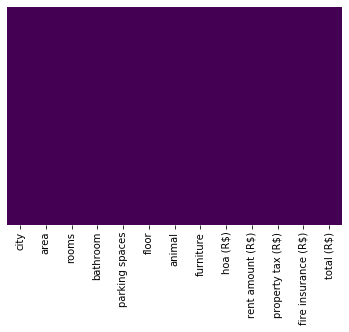

In [4]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

In [5]:
df['floor'] = df['floor'].replace('-',np.nan)
df['floor']= df['floor'].fillna(df['floor'].median()).astype('int')

In [6]:
city = df['city'].unique()
city

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [7]:
df.area.max()

46335

In [8]:
df["total (R$)"].max()

1120000

In [9]:
df.rooms.max()

13

Text(0.5, 1.0, 'Number of houses available for rent in Mexico')

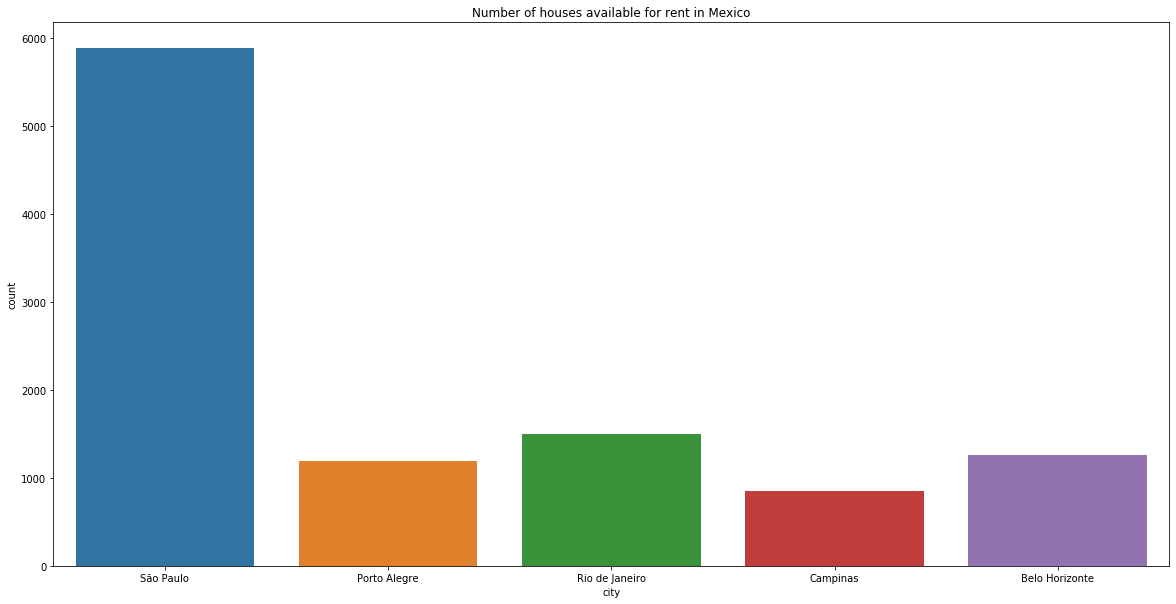

In [10]:
plt.figure(figsize=(20,10))
sns.countplot('city', data = df)
plt.title("Number of houses available for rent in Mexico")

# DOES AREA OF HOUSE EFFECT TOTAL RENT

In [11]:
"""plt.figure(figsize=(20,10))
sns.countplot('total (R$)',hue = 'city', data = df)"""

"plt.figure(figsize=(20,10))\nsns.countplot('total (R$)',hue = 'city', data = df)"

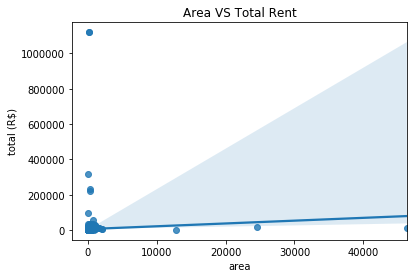

In [12]:
fig = sns.regplot(x = "area", y = "total (R$)", data = df)
plt.title("Area VS Total Rent")
plt.show()

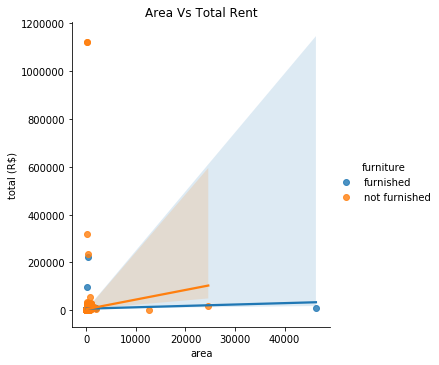

In [13]:
fig = sns.lmplot(x="area", y="total (R$)", data=df, hue="furniture")
plt.title("Area Vs Total Rent")
plt.show()

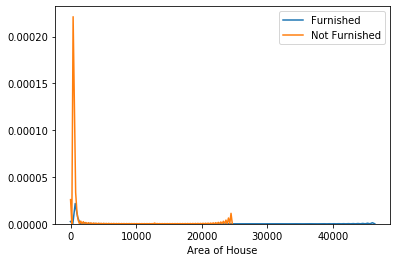

In [14]:
sns.kdeplot(df.area[df.furniture == "furnished"])
sns.kdeplot(df.area[df.furniture == "not furnished"])
plt.legend(["Furnished", "Not Furnished"])
plt.xlabel("Area of House")
plt.show()

# FURNITURE Vs TOTAL RENT

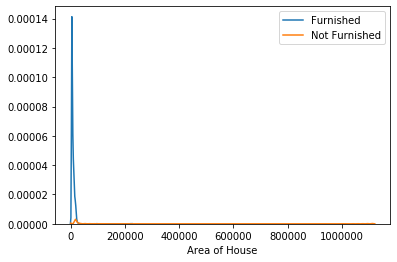

In [15]:
sns.kdeplot(df['total (R$)'][df.furniture == "furnished"])
sns.kdeplot(df['total (R$)'][df.furniture == "not furnished"])
plt.legend(["Furnished", "Not Furnished"])
plt.xlabel("Area of House")
plt.show()

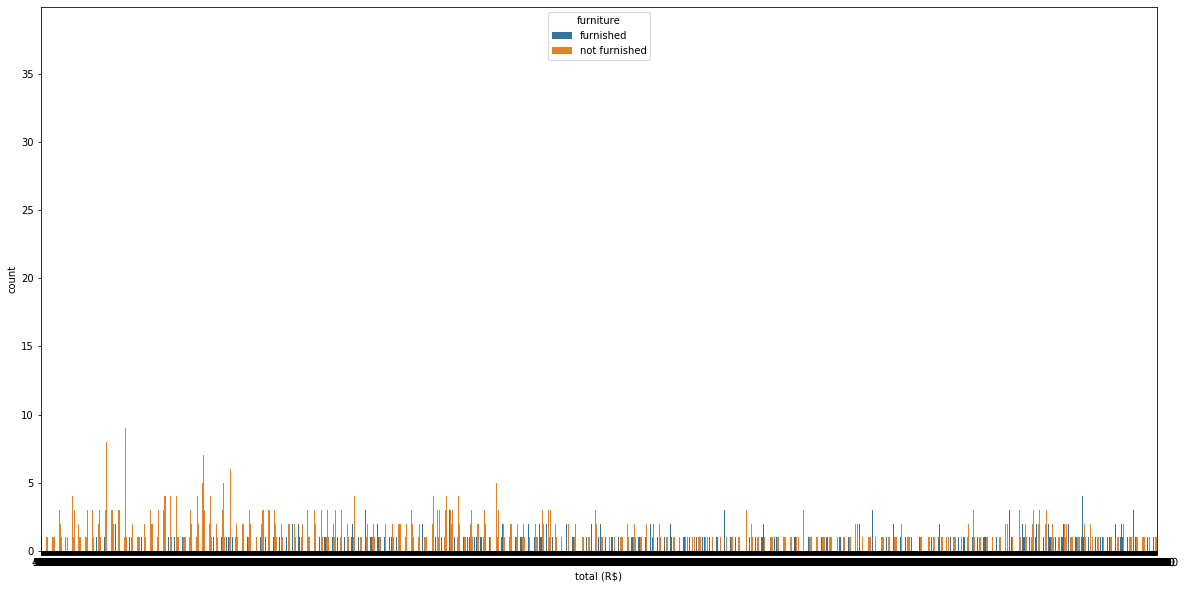

In [16]:
plt.figure(figsize=(20,10))
sns.countplot('total (R$)',hue = 'furniture', data = df)

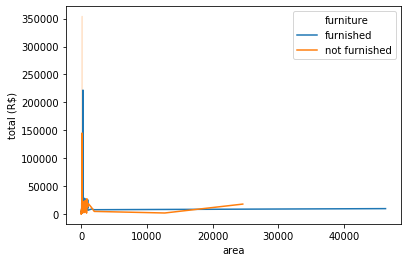

In [17]:
sns.lineplot("area","total (R$)",hue = "furniture",data = df)
plt.show()

# BATHROOM Vs TOTAL ROOMS

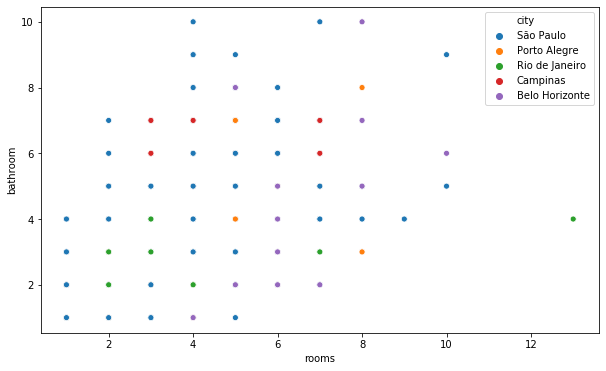

In [18]:
plt.figure(figsize = (10,6))
sns.scatterplot('rooms', 'bathroom', hue = 'city', data = df)

# PROPERTY TAX ON DIFFERENT FACTORS

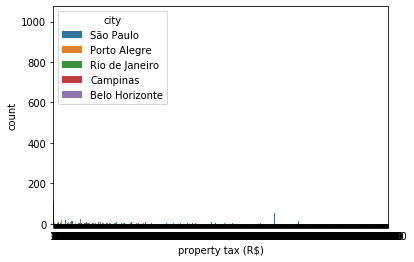

In [19]:
sns.countplot("property tax (R$)", hue = "city", data = df)
plt.show()

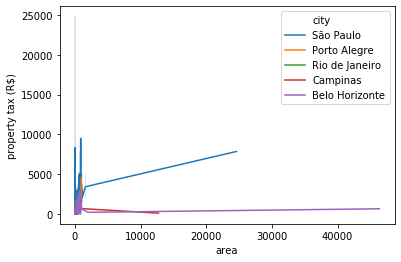

In [20]:
sns.lineplot("area","property tax (R$)",hue = "city",data = df)
plt.show()

# RENT AMOUNT ON DIFFERENT FACTORS

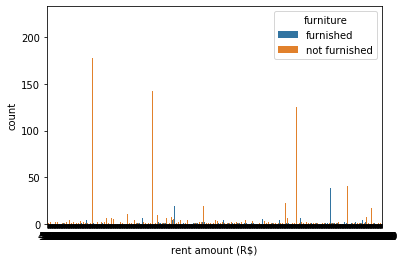

In [21]:
sns.countplot("rent amount (R$)", hue = "furniture", data = df)
plt.show()

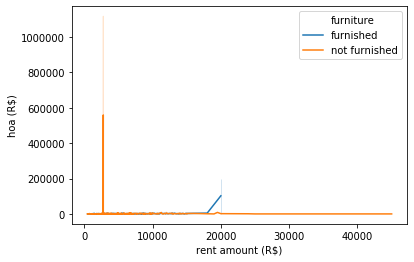

In [22]:
sns.lineplot("rent amount (R$)","hoa (R$)", hue = "furniture", data = df)
plt.show()

In [23]:
df['animal'] = pd.get_dummies(df['animal'])

In [24]:
df['furniture'] = pd.get_dummies(df['furniture'])

In [25]:
df.drop('city', axis = 1, inplace = True)

In [26]:
x = df.drop(['total (R$)'], axis = 1)
y = df['total (R$)']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, r2_score
from sklearn import metrics

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 1/3, random_state = 0)

# LINEAR REGRESSION

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
prediction =lr.predict(x_test)

In [32]:
score = round((lr.score(x_test, y_test)*100),2)
print("\nModel Score:",score,"%")


Model Score: 100.0 %


In [33]:
r2_score(y_test,prediction)

0.9999987210289762

# RANDOM FOREST REGRESSION

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0) # n_estimators ARE CALLED AS TREES IN THE FOREST REGRESSOR #
regressor.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [36]:
prediction = regressor.predict(x_test)

In [37]:
score = round((lr.score(x_test, y_test)*100),2)
print("\nModel Score:",score,"%")


Model Score: 100.0 %


In [38]:
r2_score(y_test,prediction)

0.9210906066293038

# SUPPORT VECTOR REGRESSION

In [39]:
from sklearn.svm import SVR

In [40]:
regressor = SVR(kernel = "rbf")
regressor.fit(x,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [41]:
prediction = regressor.predict(x_test)

In [42]:
r2_score(y_test,prediction)

0.031287819883196066

# DECISION TREE REGRESSION

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
regressor = DecisionTreeRegressor()
regressor.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [45]:
prediction = regressor.predict(x_test)

In [46]:
score = round((lr.score(x_test, y_test)*100),2)
print("\nModel Score:",score,"%")


Model Score: 100.0 %


In [47]:
r2_score(y_test,prediction)

1.0

# KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
lr = KNeighborsClassifier()
lr.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
prediction = lr.predict(x_test)

In [51]:
score = round((lr.score(x_test, y_test)*100),2)
print("\nModel Score:",score,"%")


Model Score: 3.9 %


In [52]:
r2_score(y_test,prediction)

0.4629119220642992

* LINEAR REGRESSION GOT THE HIGHEST SCORE AND THE MAXIMUM R^2 VALUE